In [188]:
# Import needed packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import warnings

In [189]:
# Load dataset
df = pd.read_csv('churn_prediction.csv')

In [190]:
#View the first 5 rows
df.head(5)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [191]:
#Check the sum of each missing value

df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# Handling missing values for Gender



**Plotting the bar chart of male, female and missing values**

In [192]:
#Count the number of unique items in gender column

df['gender'].unique()

array(['Male', nan, 'Female'], dtype=object)

In [193]:
# Count the number of males and females in the dataset

df['gender'].value_counts()

gender
Male      16548
Female    11309
Name: count, dtype: int64

In [194]:
#Plotting the number of males and females

#First make a copy so that we don't affect the original copy
df_copy = df.copy()

df_copy.shape

(28382, 21)

In [195]:
#count the number of males and store in a variable
count_male = df_copy['gender'].value_counts()['Male']
count_male

16548

In [196]:
#count the number of females and store in a variable
count_female = df_copy['gender'].value_counts()['Female']
count_female

11309

In [197]:
#count the number of missing values and store in a variable
count_missing = df_copy['gender'].isnull().sum()
count_missing

525

Text(0.5, 1.0, 'Bar plot for the number of males, females and missing values in the raw data')

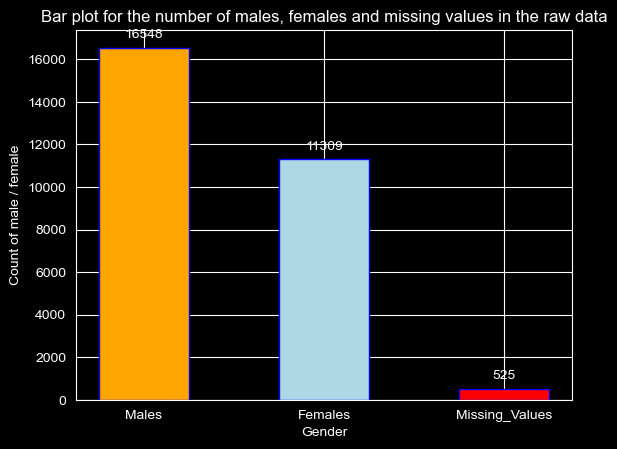

In [198]:
#plotting male and female in a bar plot
style.use('dark_background')
# plt.figure(figsize=(5, 5))
x_values = ['Males', 'Females', 'Missing_Values']
y_values = [count_male, count_female, count_missing]
colors = ['orange', 'lightblue', 'red']


bar_plot = plt.bar(x=x_values, height=y_values, width=0.5, color=colors, ec='blue')
plt.bar_label(bar_plot, labels=y_values, label_type='edge', padding=5)
plt.xlabel('Gender')
plt.ylabel('Count of male / female')
plt.title(label='Bar plot for the number of males, females and missing values in the raw data')

In [199]:
#Using Seaborn for the same visualization task
sns.set_style('darkgrid')

<Axes: >

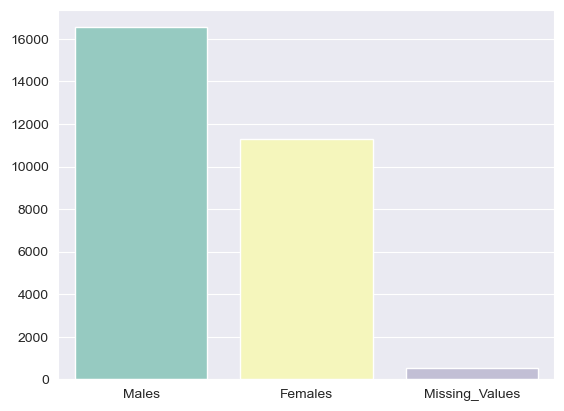

In [200]:
sns.barplot(x=x_values, y = y_values, data=df_copy)

**Filling data accordingly**

In [201]:
df_copy.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [202]:
#Replace male and female with 1 and 0 respectively and Nan with -1

In [203]:
#Create a dictionary where Male and Female are 1 and 0
dict_replace = {'Male': 1, 'Female': 0}

In [204]:
#Replace all instances of Male and Female with 1 and 0
df_replaced = df_copy.replace(to_replace=dict_replace)
df_replaced

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1.0,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0.0,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,0.0,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,1.0,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,1.0,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [205]:
df_replaced.drop(['customer_id'], axis=1)

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,35,1.0,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,31,1.0,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,0.0,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,4919,34,0.0,0.0,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,297,47,1.0,0.0,salaried,1096.0,2,588,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,2585,50,1.0,3.0,self_employed,1219.0,3,274,NaN,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


**Dependents, Occupation and City**

In [206]:
#Check missing values again
df_replaced['gender'] = df_replaced['gender'].fillna(-1)
df_replaced.head(5)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1.0,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,-1.0,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [207]:
# Dropping customer id
df_replaced.drop(['customer_id'], axis=1, inplace=True)


In [208]:
# Checking the total missing values for each column
df_replaced.isnull().sum()

vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [209]:
#Checking the datatype to be sure if string or numerical
df_replaced.dtypes

vintage                             int64
age                                 int64
gender                            float64
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [210]:
# Fix all the floats data type having missing values
# Dependents, City and Days_since_last_transaction 

In [211]:
#Calculate the mean of dependents

depend_mean = df_replaced['dependents'].mean()
depend_mean

0.34723561865812724

In [212]:
#Fill the NaN in dependents with the mean

df_replaced['dependents'] = df_replaced['dependents'].fillna(depend_mean)

In [213]:
#Check to confirm no more NaN for dependents
df_replaced.isnull().sum()

vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [214]:
#Calculate the mean of city

city_mean = df_replaced['city'].mean()
city_mean

796.1095761267632

In [215]:
#Fill the NaN in city with the mean

df_replaced['city'] = df_replaced['city'].fillna(city_mean)

In [216]:
#Check to confirm no more NaN for city
df_replaced.isnull().sum()

vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                          80
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [217]:
#Calculate the mean of days_since_last_transaction

lastran_mean = df_replaced['days_since_last_transaction'].mean()
lastran_mean

69.99781390357327

In [218]:
#Fill the NaN in city with the mean

df_replaced['days_since_last_transaction'] = df_replaced['days_since_last_transaction'].fillna(lastran_mean)

In [219]:
#Check to confirm no more NaN for days_since_last_transaction
df_replaced.isnull().sum()

vintage                            0
age                                0
gender                             0
dependents                         0
occupation                        80
city                               0
customer_nw_category               0
branch_code                        0
days_since_last_transaction        0
current_balance                    0
previous_month_end_balance         0
average_monthly_balance_prevQ      0
average_monthly_balance_prevQ2     0
current_month_credit               0
previous_month_credit              0
current_month_debit                0
previous_month_debit               0
current_month_balance              0
previous_month_balance             0
churn                              0
dtype: int64

In [220]:
# Fix occupation missing value - which is a string

# See the unique values

df_replaced['occupation'].unique()

array(['self_employed', 'salaried', 'retired', 'student', nan, 'company'],
      dtype=object)

In [221]:
# See the counts to determine the mode - apparently self_employed
df_replaced['occupation'].value_counts()

occupation
self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: count, dtype: int64

In [222]:
# Replace missing occupation with the mode - self_employed
df_replaced['occupation'] = df_replaced['occupation'].fillna('self_employed ')

In [223]:
# Checking the missing values
df_replaced.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [224]:
# Create dummy values for the occupation

dummies = pd.get_dummies(df_replaced.occupation, dtype=int)
dummies

,company,retired,salaried,self_employed,self_employed,student
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
28377,0,0,0,0,0,1
28378,0,0,0,1,0,0
28379,0,0,1,0,0,0
28380,0,0,0,1,0,0


In [225]:
# Combining the dummies with the original data
final_df = pd.concat([df_replaced, dummies], axis=1)
final_df

,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,...,previous_month_debit,current_month_balance,previous_month_balance,churn,company,retired,salaried,self_employed,self_employed,student
0,3135,66,1.0,0.000000,self_employed,187.000000,2,755,224.000000,1458.71,...,0.20,1458.71,1458.71,0,0,0,0,1,0,0
1,310,35,1.0,0.000000,self_employed,796.109576,2,3214,60.000000,5390.37,...,100.56,6496.78,8787.61,0,0,0,0,1,0,0
2,2356,31,1.0,0.000000,salaried,146.000000,2,41,69.997814,3913.16,...,259.23,5006.28,5070.14,0,0,0,1,0,0,0
3,478,90,-1.0,0.347236,self_employed,1020.000000,2,582,147.000000,2291.91,...,2143.33,2291.91,1669.79,1,0,0,0,1,0,0
4,2531,42,1.0,2.000000,self_employed,1494.000000,3,388,58.000000,927.72,...,1538.06,1157.15,1677.16,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,0.0,0.000000,student,1020.000000,2,1207,70.000000,1076.43,...,0.30,1076.43,1076.43,0,0,0,0,0,0,1
28378,4919,34,0.0,0.000000,self_employed,1046.000000,2,223,14.000000,3844.10,...,1014.07,3738.54,3690.32,0,0,0,0,1,0,0
28379,297,47,1.0,0.000000,salaried,1096.000000,2,588,0.000000,65511.97,...,71.80,61078.50,57564.24,1,0,0,1,0,0,0
28380,2585,50,1.0,3.000000,self_employed,1219.000000,3,274,69.997814,1625.55,...,0.20,1625.55,1625.55,0,0,0,0,1,0,0


In [227]:
# Drop redundant column - occupation
final_df.drop(['occupation'], axis=1, inplace=True)

In [228]:
# View final dataframe
final_df

,vintage,age,gender,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_debit,current_month_balance,previous_month_balance,churn,company,retired,salaried,self_employed,self_employed,student
0,3135,66,1.0,0.000000,187.000000,2,755,224.000000,1458.71,1458.71,...,0.20,1458.71,1458.71,0,0,0,0,1,0,0
1,310,35,1.0,0.000000,796.109576,2,3214,60.000000,5390.37,8704.66,...,100.56,6496.78,8787.61,0,0,0,0,1,0,0
2,2356,31,1.0,0.000000,146.000000,2,41,69.997814,3913.16,5815.29,...,259.23,5006.28,5070.14,0,0,0,1,0,0,0
3,478,90,-1.0,0.347236,1020.000000,2,582,147.000000,2291.91,2291.91,...,2143.33,2291.91,1669.79,1,0,0,0,1,0,0
4,2531,42,1.0,2.000000,1494.000000,3,388,58.000000,927.72,1401.72,...,1538.06,1157.15,1677.16,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,0.0,0.000000,1020.000000,2,1207,70.000000,1076.43,1076.43,...,0.30,1076.43,1076.43,0,0,0,0,0,0,1
28378,4919,34,0.0,0.000000,1046.000000,2,223,14.000000,3844.10,4069.21,...,1014.07,3738.54,3690.32,0,0,0,0,1,0,0
28379,297,47,1.0,0.000000,1096.000000,2,588,0.000000,65511.97,61017.55,...,71.80,61078.50,57564.24,1,0,0,1,0,0,0
28380,2585,50,1.0,3.000000,1219.000000,3,274,69.997814,1625.55,1625.55,...,0.20,1625.55,1625.55,0,0,0,0,1,0,0


# All Done